In [17]:
import numpy as np
import pandas as pd

# 데이터 로딩
patient_data = pd.read_csv("data/Health_Data.csv")

# 종속 변수와 독립 변수를 구분
X = patient_data.iloc[:,1:9]
y = patient_data.iloc[:,9]

# 범주형 변수를 변화할 더미 변수를 만들고
A_type = pd.get_dummies(X.iloc[:,1], drop_first=True, prefix='Atype')
New_gender = pd.get_dummies(X.iloc[:,4], drop_first=True, prefix='Gender')
Pre_exdis = pd.get_dummies(X.iloc[:,2], drop_first=True, prefix='PreExistDis')

# 원래 있던 범주형 변수 제거 후 변환된 수치적인 더미 변수로 대체
X.drop(['Admission_type','PreExistingDisease','Gender'], axis=1, inplace=True)
X = pd.concat([X, A_type, New_gender, Pre_exdis], axis=1)

# test_size 는 0.25로, random_state 는 500 으로 수정
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.25, random_state=500)

# StandardScaler 함수를 이용해서 데이터 척도를 맞춘다.
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
xtrain = sc.fit_transform(xtrain)
xtrain = pd.DataFrame(xtrain, columns=xtest.columns)
xtest = sc.transform(xtest)
xtest = pd.DataFrame(xtest, columns=xtrain.columns)

# 데이터 프레임을 넘파이 배열로 전환
x_train = xtrain.values
x_test = xtest.values
y_train = ytrain.values
y_test = ytest.values

# 신경망 아키텍처 구축
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
#
model = Sequential()
# 첫번째 밀집 레이어와 드롭아웃 레이어 추가
model.add(Dense(units=6, activation='relu', kernel_initializer='uniform', input_dim=11))
model.add(Dropout(rate=0.3))
# 두번째 밀집 레이어와 드롭아웃 레이어 추가
model.add(Dense(units=6, activation='relu', kernel_initializer='uniform'))
model.add(Dropout(rate=0.3))
# 결과 밀집 레이어 추가
model.add(Dense(units=1, activation='sigmoid', kernel_initializer='uniform'))
# 모델 컴파일
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# 모델 피팅
model.fit(x_train, y_train, epochs=300, batch_size=20)

Epoch 1/300
267/267 [==============================] - 0s 841us/step - loss: 0.6914 - acc: 0.7978
Epoch 2/300
267/267 [==============================] - 0s 88us/step - loss: 0.6865 - acc: 0.8127
Epoch 3/300
267/267 [==============================] - 0s 87us/step - loss: 0.6815 - acc: 0.8127
Epoch 4/300
267/267 [==============================] - 0s 143us/step - loss: 0.6754 - acc: 0.8127
Epoch 5/300
267/267 [==============================] - 0s 390us/step - loss: 0.6696 - acc: 0.8127
Epoch 6/300
267/267 [==============================] - 0s 411us/step - loss: 0.6621 - acc: 0.8127
Epoch 7/300
267/267 [==============================] - 0s 428us/step - loss: 0.6522 - acc: 0.8127
Epoch 8/300
267/267 [==============================] - 0s 412us/step - loss: 0.6443 - acc: 0.8127
Epoch 9/300
267/267 [==============================] - 0s 427us/step - loss: 0.6290 - acc: 0.8127
Epoch 10/300
267/267 [==============================] - 0s 383us/step - loss: 0.6066 - acc: 0.8127
Epoch 11/300
267/267 

267/267 [==============================] - 0s 324us/step - loss: 0.3452 - acc: 0.8764
Epoch 84/300
267/267 [==============================] - 0s 331us/step - loss: 0.2898 - acc: 0.8989
Epoch 85/300
267/267 [==============================] - 0s 322us/step - loss: 0.3069 - acc: 0.8989
Epoch 86/300
267/267 [==============================] - 0s 320us/step - loss: 0.3331 - acc: 0.8764
Epoch 87/300
267/267 [==============================] - 0s 323us/step - loss: 0.3211 - acc: 0.8727
Epoch 88/300
267/267 [==============================] - 0s 324us/step - loss: 0.3065 - acc: 0.9064
Epoch 89/300
267/267 [==============================] - 0s 320us/step - loss: 0.3524 - acc: 0.8727
Epoch 90/300
267/267 [==============================] - 0s 328us/step - loss: 0.3130 - acc: 0.9064
Epoch 91/300
267/267 [==============================] - 0s 324us/step - loss: 0.3113 - acc: 0.8876
Epoch 92/300
267/267 [==============================] - 0s 315us/step - loss: 0.2875 - acc: 0.8951
Epoch 93/300
267/267 [=

267/267 [==============================] - 0s 325us/step - loss: 0.3051 - acc: 0.8951
Epoch 166/300
267/267 [==============================] - 0s 323us/step - loss: 0.3216 - acc: 0.8914
Epoch 167/300
267/267 [==============================] - 0s 315us/step - loss: 0.3008 - acc: 0.8951
Epoch 168/300
267/267 [==============================] - 0s 329us/step - loss: 0.3047 - acc: 0.8989
Epoch 169/300
267/267 [==============================] - 0s 326us/step - loss: 0.2944 - acc: 0.9101
Epoch 170/300
267/267 [==============================] - 0s 330us/step - loss: 0.3000 - acc: 0.8914
Epoch 171/300
267/267 [==============================] - 0s 327us/step - loss: 0.3034 - acc: 0.8951
Epoch 172/300
267/267 [==============================] - 0s 322us/step - loss: 0.3052 - acc: 0.8989
Epoch 173/300
267/267 [==============================] - 0s 321us/step - loss: 0.3182 - acc: 0.9026
Epoch 174/300
267/267 [==============================] - 0s 325us/step - loss: 0.3078 - acc: 0.8801
Epoch 175/300


267/267 [==============================] - 0s 322us/step - loss: 0.3133 - acc: 0.8876
Epoch 248/300
267/267 [==============================] - 0s 322us/step - loss: 0.2895 - acc: 0.9064
Epoch 249/300
267/267 [==============================] - 0s 328us/step - loss: 0.2966 - acc: 0.9064
Epoch 250/300
267/267 [==============================] - 0s 325us/step - loss: 0.2982 - acc: 0.8914
Epoch 251/300
267/267 [==============================] - 0s 325us/step - loss: 0.3089 - acc: 0.8989
Epoch 252/300
267/267 [==============================] - 0s 318us/step - loss: 0.2855 - acc: 0.9213
Epoch 253/300
267/267 [==============================] - 0s 322us/step - loss: 0.2713 - acc: 0.8951
Epoch 254/300
267/267 [==============================] - 0s 325us/step - loss: 0.3304 - acc: 0.8951
Epoch 255/300
267/267 [==============================] - 0s 326us/step - loss: 0.3380 - acc: 0.8951
Epoch 256/300
267/267 [==============================] - 0s 320us/step - loss: 0.3189 - acc: 0.8951
Epoch 257/300


In [18]:
# 예측 변수 2개 생성
y_pred_class = model.predict(x_test)
y_pred_prob = model.predict_proba(x_test)

# 클래스 예측을 위한 임계치 설정
y_pred_class = y_pred_class > 0.5

# 사이킷런의 accuracy_score 함수를 사용해 정확성을 계산
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred_class)

0.8777777777777778

In [19]:
# 판다스 value_count 함수를 사용해 널 정확성을 계산
ytest.value_counts().head(1)/len(ytest)

0    0.788889
Name: Readmitted, dtype: float64

In [20]:
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(ytest, y_pred_class)

In [21]:
confusion_matrix

array([[69,  2],
       [ 9, 10]])

In [23]:
# TN, FN, FP, TP 구하기
TN = confusion_matrix[0,0]
FN = confusion_matrix[1,0]
FP = confusion_matrix[0,1]
TP = confusion_matrix[1,1]

In [24]:
TN

69

In [25]:
FN

9

In [26]:
FP

2

In [27]:
TP

10

In [28]:
# 민감성
Sensitivity = TP / (TP + FN)
Sensitivity

0.5263157894736842

In [29]:
# 특이도
Specificity = TN / (TN + FP)
Specificity

0.971830985915493

In [30]:
# 정밀도
Precision = TP / (TP + FP)
Precision

0.8333333333333334

In [31]:
# FPR
FalsePositiveRate = FP / (FP + TN)
FalsePositiveRate

0.028169014084507043

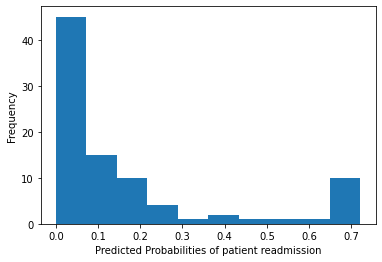

In [32]:
# 시각화
import matplotlib.pyplot as plt
%matplotlib inline
# 클래스 분류 이력 도표
plt.hist(y_pred_prob)
plt.xlabel('Predicted Probabilities of patient readmission')
plt.ylabel('Frequency')
plt.show()

In [33]:
## roc_curve 를 임포트
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

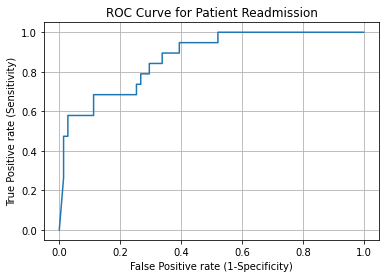

In [34]:
# roc 곡선 그리기
import matplotlib.pyplot as plt
plt.plot(fpr, tpr)
plt.title('ROC Curve for Patient Readmission')
plt.xlabel('False Positive rate (1-Specificity)')
plt.ylabel('True Positive rate (Sensitivity)')
plt.grid(True)
plt.show()

In [35]:
def optimum_threshold(my_threshold):
    print("Sensitivity: ", tpr[thresholds > my_threshold][-1])
    print("Specificity: ", 1-fpr[thresholds > my_threshold][-1])

In [36]:
optimum_threshold(0.3)

Sensitivity:  0.5789473684210527
Specificity:  0.971830985915493


In [37]:
optimum_threshold(0.5)

Sensitivity:  0.47368421052631576
Specificity:  0.971830985915493


In [38]:
optimum_threshold(0.03)

Sensitivity:  1.0
Specificity:  0.47887323943661975


In [39]:
optimum_threshold(0.1)

Sensitivity:  0.7894736842105263
Specificity:  0.704225352112676


In [40]:
# auc 점수 계산
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_pred_prob)

0.8713862120088954